# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [136]:
df[df['player1 total points won'].isna()]

,player1 total points won,surface
4,NaN,Outdoor: Clay
6,NaN,Indoor: Hard
7,NaN,Indoor: Hard
8,NaN,Indoor: Hard
9,NaN,Indoor: Hard
...,...,...
1151,NaN,Outdoor: Hard
1164,NaN,Indoor: Hard
1168,NaN,Indoor: Clay
1170,NaN,Outdoor: Hard


In [104]:
x = pd.get_dummies(df['surface'], drop_first=True)
x

,Indoor: Clay,Indoor: Hard,Outdoor: Clay,Outdoor: Grass,Outdoor: Hard
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1174,0,0,0,0,1
1175,0,0,0,0,1
1176,0,0,0,0,1
1177,0,0,0,0,1


In [156]:
df['in_out'] = df['surface'].str.split(':', expand=True)[0]
xx = pd.get_dummies(df['in_out'], drop_first=True)
xx

est = sm.OLS(
    df['player1 total points won'], 
    sm.add_constant(xx), missing='drop').fit()
est.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.029
Model:                                  OLS   Adj. R-squared:                  0.028
Method:                       Least Squares   F-statistic:                     31.02
Date:                      Sat, 16 Jan 2021   Prob (F-statistic):           3.26e-08
Time:                              12:01:32   Log-Likelihood:                -4858.5
No. Observations:                      1027   AIC:                             9721.
Df Residuals:                          1025   BIC:                             9731.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.4781      1.733     45.277      0.000      75.077      81.879
Outdoor       11.1057      1.994      5.569      0.000       7.193      15.019
==============================================================================
Omnibus:                      160.957   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.050
Skew:                           0.977   Prob(JB):                     5.67e-62
Kurtosis:                       4.664   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

['Indoor: Hard' 'Outdoor: Clay' 'Indoor: Carpet' 'Outdoor: Hard'
 'Outdoor: Grass' 'Indoor: Clay']
/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     16.58
Date:                      Sat, 16 Jan 2021   Prob (F-statistic):           3.59e-13
Time:                              12:10:45   Log-Likelihood:                -4849.5
No. Observations:                      1027   AIC:                             9709.
Df Residuals:                          1022   BIC:                             9734.
Df Model:                                 4                                         
Covariance Type:                        HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.411     24.403      0.000      76.543      89.913
Indoor: Clay   -4.198e-14   5.74e-15     -7.313      0.000   -5.32e-14   -3.07e-14
Indoor: Hard      -6.1456      3.629     -1.693      0.090     -13.259       0.968
Outdoor: Clay      4.8599      3.990      1.218      0.223      -2.961      12.680
Outdoor: Grass    14.9386      4.492      3.326      0.001       6.135      23.742
Outdoor: Hard      4.4635      3.657      1.221      0.222      -2.703      11.630
==============================================================================
Omnibus:                      147.179   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.816
Skew:                           0.932   Prob(JB):                     1.88e-53
Kurtosis:                       4.484   Cond. No.                     3.90e+16
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 8.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

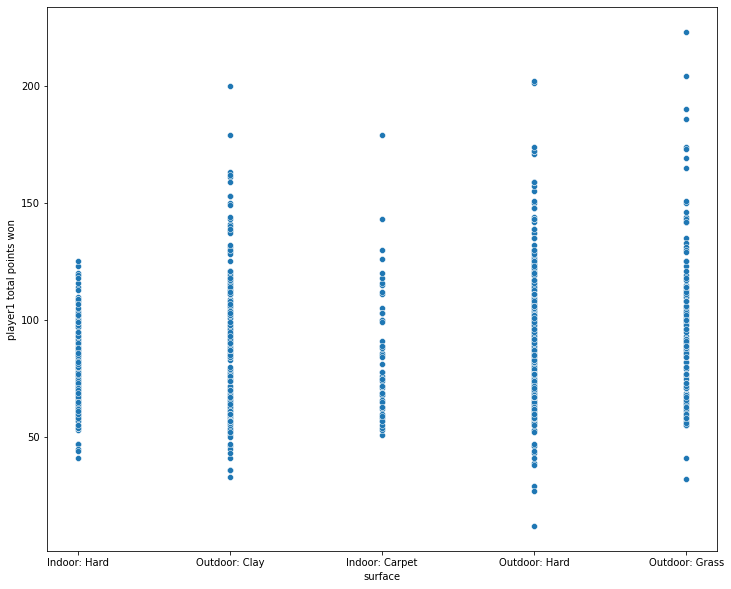

In [160]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('data/tennis.csv')
# df = df.fillna(0.)
df = df[['player1 total points won', 'surface']]
df.head()

print(df.surface.unique())

plt.subplots(figsize=(12,10))
sns.scatterplot(x='surface', y='player1 total points won', data=df)
x = pd.get_dummies(df['surface'], drop_first=True)
# x = x.drop('Outdoor: Hard', axis=1) #dropped because wasn't significant but also had the most points so.....?
# x = x.drop('Indoor: Clay', axis = 1)
# est = sm.OLS(
#     df['player1 total points won'], 
#     sm.add_constant(x), missing='drop').fit(cov_type='HC2') #this one uses missing='drop' to deal with missing values. Instead I filled 'na's with 0 (at the top with df.fillna(0.))

est = sm.OLS(
    df['player1 total points won'], 
    sm.add_constant(x), missing='drop').fit(cov_type='HC2')
est.summary() 

# x.corrwith(df['player1 total points won'])

# dropped one is: Indoor: Carpet?.
# whenever there is . total points won would increase would increase by 1 point if indoor clay decreases by 1.005e-13 units. 

#assuming p values are OK:
## constant 83. If the dropped one is 1, and the rest are 0, the answer is the constant.  
## Indoor: Clay: the answer is again 83 (or just slightly slightly less) because the coeff is so small. If multiplied by 1, its basically 0. 
## Indoor: Hard: -6  * 1, so 83-6 would be the total points won on that surface. 


In [103]:
x_copy = x.copy()

x_copy['y'] = df['player1 total points won']

x_copy.corr()

,Indoor: Clay,Indoor: Hard,Outdoor: Clay,Outdoor: Grass,Outdoor: Hard,y
Indoor: Clay,1.000000,-0.034828,-0.037007,-0.026253,-0.059475,NaN
Indoor: Hard,-0.034828,1.000000,-0.251980,-0.178757,-0.404963,-0.169616
Outdoor: Clay,-0.037007,-0.251980,1.000000,-0.189939,-0.430294,0.022582
Outdoor: Grass,-0.026253,-0.178757,-0.189939,1.000000,-0.305255,0.155805
Outdoor: Hard,-0.059475,-0.404963,-0.430294,-0.305255,1.000000,0.024955
y,NaN,-0.169616,0.022582,0.155805,0.024955,1.000000


In [101]:
x[x['Indoor: Clay'] == 1]

,Indoor: Clay,Indoor: Hard,Outdoor: Clay,Outdoor: Grass,Outdoor: Hard
266,1,0,0,0,0
267,1,0,0,0,0
455,1,0,0,0,0
456,1,0,0,0,0
474,1,0,0,0,0
1168,1,0,0,0,0


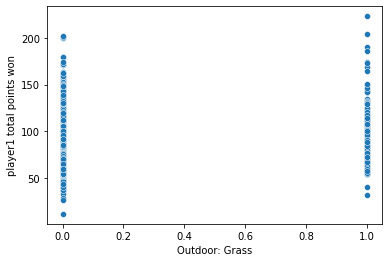

In [85]:
x = pd.get_dummies(df['surface'], drop_first=True)
sns.scatterplot(x=x['Outdoor: Grass'], y='player1 total points won', data=df)

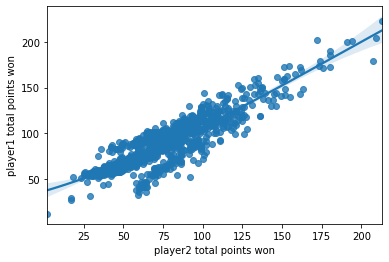

In [72]:
sns.regplot(x='player2 total points won', y='player1 total points won', data=df, order=3)

#dont need this, just wanted to try regplot. 

####whenever he plays on outdoor grass we can better predict his total points. But that doesnt mean that he can score better. 

In [56]:
df.groupby('surface')['player1 total points won'].sum()

surface
Indoor: Carpet     4744.0
Indoor: Clay          0.0
Indoor: Hard      14954.0
Outdoor: Clay     19027.0
Outdoor: Grass    12958.0
Outdoor: Hard     37532.0
Name: player1 total points won, dtype: float64

In [58]:
list(df.columns)

['year',
 'tournament',
 'start date',
 'type',
 'surface',
 'draw',
 'atp points',
 'atp ranking',
 'tournament prize money',
 'round',
 'opponent',
 'ranking',
 'score',
 'stats link',
 'tournament.1',
 'tournament round',
 'time',
 'winner',
 'player1 name',
 'player1 nationality',
 'player1 aces',
 'player1 double faults',
 'player1 1st serves in',
 'player1 1st serves total',
 'player1 1st serve points won',
 'player1 1st serve points total',
 'player1 2nd serve points won',
 'player1 2nd serve points total',
 'player1 break points won',
 'player1 break points total',
 'player1 service games played',
 'player1 1st serve return points won',
 'player1 1st serve return points total',
 'player1 2nd serve return points won',
 'player1 2nd serve return points total',
 'player1 break points converted won',
 'player1 break points converted total',
 'player1 return games played',
 'player1 total service points won',
 'player1 total service points total',
 'player1 total return points won',

In [ ]:
# 1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value.

#

# Also the condition number is huge, indicating severe multicollinearity. 

In [ ]:
# 2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

# Yes, the regression should include a constant term because otherwise our model tries to fit through (0,0). Also the AIC and BIC are lower (aka better) with a constant (AIC: over 10000 without a constant, vs 9709 with a constant). 
# With a constant, a lot of the coefficients become insignificant, indicating that our choice of features for the model is probably not the best for predicting Federer's points. 
# With regards to interpretation, 

In [163]:
# 3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

from scipy.stats import ttest_ind_from_stats

# 1 = Outdoor: Clay
# 2 = Outdoor: Grass
# Outdoor: Clay	4.8599	4.059	1.197	0.232	-3.106	12.826
# Outdoor: Grass	14.9386	4.321	3.457	0.001	6.460	23.417



ttest_ind_from_stats(mean1=4.8599, std1=4.059, nobs1=1027,
                     mean2=14.9386, std2=4.321, nobs2=1027)

# The largest coefficient is statistically significantly diffrent from the second largest coefficient (t = -54.48, p < .05)

Ttest_indResult(statistic=-54.481438083892506, pvalue=0.0)

In [37]:
df[(df['surface'] == 'Indoor: Clay') & (df['win'] == True)]

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
266,2002,"RUS v SUI WG Rd 1, Moscow, Russia",2002-02-08,DC,Indoor: Clay,Draw: 4,NaN,13.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
267,2002,"RUS v SUI WG Rd 1, Moscow, Russia",2002-02-08,DC,Indoor: Clay,Draw: 4,NaN,13.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
455,2004,"ROM v. SUI WG 1st RD, Romania",2004-02-06,DC,Indoor: Clay,Draw: 4,NaN,1.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
456,2004,"ROM v. SUI WG 1st RD, Romania",2004-02-06,DC,Indoor: Clay,Draw: 4,NaN,1.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
474,2005,"SUI vs. GBR WG PO, Geneva, Switzerland",2005-09-23,DC,Indoor: Clay,Draw: 4,NaN,1.0,$,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [ ]:
# for classification (aka survived is 0 or 1), logistic regression is better to use. Itll give you a probability of survival (between 0 and 1)

In [298]:
# Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).
# # 1. Use non-regularized regression to build the best model you can. Show 2 alternate model specifications and explain why you chose the one you did. 

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = sns.load_dataset('titanic')
df.sample(5)
# df.deck.hist(bins=50)

df['deck'] = df['deck'].astype('object')
df.dtypes
# df['deck']
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [324]:
# replacing the 177 nans in age 

mean = X["age"].mean()
std = X["age"].std()
is_null = X["age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = X["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
X["age"] = age_slice
X["age"] = X["age"].astype(int)
X["age"].isnull().sum()

0

In [342]:
# df = sns.load_dataset('titanic') 
# df['deck'] = df['deck'].fillna(0)

# Dropping 'survived' because target variable
# Dropping 'alive' because same as target variable
# Dropping 'deck' because 77% of data missing
# Dropping 'embark_town' because same as 'embarked'
X = df.drop(columns = ['survived', 'alive', 'deck', 'embark_town'], axis=1) 
y = df['survived']

X.head()


cat_var = ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone'] #onehotencode
con_var = ['pclass', 'age', 'sibsp', 'parch', 'fare'] #going to square and cube
# can build a forloop 

# replacing the 177 nans in age 
mean = X["age"].mean()
std = X["age"].std()
is_null = X["age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = X["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
X["age"] = age_slice
X["age"] = X["age"].astype(int)
X["age"].isnull().sum()

ohe = pd.get_dummies(data=X, columns=cat_var, drop_first=True)
ohe 



,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,alone_True
0,3,22,1,0,7.2500,1,0,1,0,1,1,0,1,0
1,1,38,1,0,71.2833,0,0,0,0,0,0,1,0,0
2,3,26,0,0,7.9250,0,0,1,0,1,0,1,0,1
3,1,35,1,0,53.1000,0,0,1,0,0,0,1,0,0
4,3,35,0,0,8.0500,1,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1,1,0,1,0,1,1
887,1,19,0,0,30.0000,0,0,1,0,0,0,1,0,1
888,3,43,1,2,23.4500,0,0,1,0,1,0,1,0,0
889,1,26,0,0,30.0000,1,0,0,0,0,1,0,1,1


In [343]:
X_sq = X[con_var].apply(np.square)
X_sq.columns = df[con_var].columns+"_sq"
sq_df = pd.concat((X, X_sq), axis=1)
X_sq

,pclass_sq,age_sq,sibsp_sq,parch_sq,fare_sq
0,9,484,1,0,52.562500
1,1,1444,1,0,5081.308859
2,9,676,0,0,62.805625
3,1,1225,1,0,2819.610000
4,9,1225,0,0,64.802500
...,...,...,...,...,...
886,4,729,0,0,169.000000
887,1,361,0,0,900.000000
888,9,1849,1,4,549.902500
889,1,676,0,0,900.000000


In [344]:
X_cb = X[con_var] ** 3
X_cb.columns = df[con_var].columns+"_cb"
sq_df = pd.concat((X, X_sq), axis=1)
X_cb

,pclass_cb,age_cb,sibsp_cb,parch_cb,fare_cb
0,27,10648,1,0,381.078125
1,1,54872,1,0,362212.463781
2,27,17576,0,0,497.734578
3,1,42875,1,0,149721.291000
4,27,42875,0,0,521.660125
...,...,...,...,...,...
886,8,19683,0,0,2197.000000
887,1,6859,0,0,27000.000000
888,27,79507,1,8,12895.213625
889,1,17576,0,0,27000.000000


In [345]:
new_df = ohe.join(X_sq)
new_df = new_df.join(X_cb)
# new_df = new_df.drop(['survived', 'alive'], axis=1)
new_df

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,pclass_sq,age_sq,sibsp_sq,parch_sq,fare_sq,pclass_cb,age_cb,sibsp_cb,parch_cb,fare_cb
0,3,22,1,0,7.2500,1,0,1,0,1,...,9,484,1,0,52.562500,27,10648,1,0,381.078125
1,1,38,1,0,71.2833,0,0,0,0,0,...,1,1444,1,0,5081.308859,1,54872,1,0,362212.463781
2,3,26,0,0,7.9250,0,0,1,0,1,...,9,676,0,0,62.805625,27,17576,0,0,497.734578
3,1,35,1,0,53.1000,0,0,1,0,0,...,1,1225,1,0,2819.610000,1,42875,1,0,149721.291000
4,3,35,0,0,8.0500,1,0,1,0,1,...,9,1225,0,0,64.802500,27,42875,0,0,521.660125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1,1,0,...,4,729,0,0,169.000000,8,19683,0,0,2197.000000
887,1,19,0,0,30.0000,0,0,1,0,0,...,1,361,0,0,900.000000,1,6859,0,0,27000.000000
888,3,43,1,2,23.4500,0,0,1,0,1,...,9,1849,1,4,549.902500,27,79507,1,8,12895.213625
889,1,26,0,0,30.0000,1,0,0,0,0,...,1,676,0,0,900.000000,1,17576,0,0,27000.000000


In [346]:
total = X.isnull().sum().sort_values(ascending=False)
percent_1 = X.isnull().sum()/X.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

new_df.isnull().sum()

pclass             0
age                0
sibsp              0
parch              0
fare               0
sex_male           0
embarked_Q         0
embarked_S         0
class_Second       0
class_Third        0
who_man            0
who_woman          0
adult_male_True    0
alone_True         0
pclass_sq          0
age_sq             0
sibsp_sq           0
parch_sq           0
fare_sq            0
pclass_cb          0
age_cb             0
sibsp_cb           0
parch_cb           0
fare_cb            0
dtype: int64

In [347]:
X = new_df
y = df['survived']

est = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC2')
est.summary() 


/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 20
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          6.80e-224
Time:                        13:26:51   Log-Likelihood:                -358.31
No. Observations:                 891   AIC:                             758.6
Df Residuals:                     870   BIC:                             859.3
Df Model:                          20                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5755      0.087      6.618      0.000       0.405       0.746
pclass              0.3811      0.055      6.891      0.000       0.273       0.489
age                -0.0082      0.013     -0.632      0.527      -0.034       0.017
sibsp               0.1031      0.076      1.362      0.173      -0.045       0.251
parch               0.0203      0.090      0.226      0.821      -0.156       0.197
fare                0.0025      0.002      1.340      0.180      -0.001       0.006
sex_male           -0.0071      0.086     -0.082      0.935      -0.175       0.161
embarked_Q         -0.0037      0.055     -0.067      0.947      -0.111       0.104
embarked_S         -0.0497      0.036     -1.362      0.173      -0.121       0.022
class_Second       -0.3127      0.057     -5.472      0.000      -0.425      -0.201
class_Third         0.0592      0.012      4.926      0.000       0.036       0.083
who_man            -0.2556      0.061     -4.180      0.000      -0.376      -0.136
who_woman           0.0384      0.103      0.373      0.709      -0.163       0.240
adult_male_True    -0.2556      0.061     -4.180      0.000      -0.376      -0.136
alone_True          0.0290      0.066      0.438      0.661      -0.101       0.159
pclass_sq           0.1105      0.019      5.842      0.000       0.073       0.148
age_sq              0.0002      0.000      0.416      0.677      -0.001       0.001
sibsp_sq           -0.0976      0.030     -3.300      0.001      -0.156      -0.040
parch_sq           -0.0097      0.050     -0.196      0.844      -0.107       0.087
fare_sq         -1.616e-05   9.95e-06     -1.625      0.104   -3.57e-05    3.33e-06
pclass_cb          -0.0756      0.010     -7.214      0.000      -0.096      -0.055
age_cb            -1.5e-06   3.62e-06     -0.414      0.679    -8.6e-06     5.6e-06
sibsp_cb            0.0099      0.003      3.673      0.000       0.005       0.015
parch_cb           -0.0019      0.007     -0.288      0.774      -0.015       0.011
fare_cb          2.578e-08   1.35e-08      1.906      0.057   -7.29e-10    5.23e-08
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.922
Skew:                           0.552   Prob(JB):                     2.64e-13
Kurtosis:                       3.586   Cond. No.                     1.84e+24
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 1.72e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [348]:
# now we begin dropping the VERY insignificant ones:

X_model2 = new_df.drop(columns=['parch_cb', 'age_cb', 'parch_sq', 'age_sq', 'alone_True', 'who_woman', 'embarked_Q', 'sex_male', 'parch', 'age'], axis = 1)

y = df['survived']

est_2 = sm.OLS(y, sm.add_constant(X_model2)).fit(cov_type='HC2')
est_2.summary() 

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          1.06e-222
Time:                        13:28:17   Log-Likelihood:                -368.69
No. Observations:                 891   AIC:                             759.4
Df Residuals:                     880   BIC:                             812.1
Df Model:                          10                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5356      0.057      9.467      0.000       0.425       0.646
pclass              0.3556      0.032     11.199      0.000       0.293       0.418
sibsp               0.0661      0.046      1.429      0.153      -0.025       0.157
fare                0.0017      0.002      0.945      0.345      -0.002       0.005
embarked_S         -0.0555      0.030     -1.838      0.066      -0.115       0.004
class_Second       -0.2888      0.047     -6.208      0.000      -0.380      -0.198
class_Third         0.0544      0.010      5.272      0.000       0.034       0.075
who_man            -0.2811      0.015    -18.568      0.000      -0.311      -0.251
adult_male_True    -0.2811      0.015    -18.568      0.000      -0.311      -0.251
pclass_sq           0.1044      0.010     10.459      0.000       0.085       0.124
sibsp_sq           -0.0794      0.020     -3.975      0.000      -0.119      -0.040
fare_sq         -1.207e-05   9.89e-06     -1.221      0.222   -3.14e-05     7.3e-06
pclass_cb          -0.0714      0.006    -11.856      0.000      -0.083      -0.060
sibsp_cb            0.0082      0.002      4.197      0.000       0.004       0.012
fare_cb          2.047e-08   1.35e-08      1.520      0.128   -5.92e-09    4.69e-08
==============================================================================
Omnibus:                       44.047   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.727
Skew:                           0.523   Prob(JB):                     9.66e-12
Kurtosis:                       3.520   Cond. No.                     4.42e+23
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 2.97e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [350]:
# keep dropping the insignificant ones:

X_model3 = X_model2.drop(columns=['fare_cb', 'fare_sq', 'fare', 'sibsp'], axis = 1)

y = df['survived']

est_3 = sm.OLS(y, sm.add_constant(X_model3)).fit(cov_type='HC2')
est_3.summary() 

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 7
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     291.4
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          1.21e-224
Time:                        13:29:13   Log-Likelihood:                -372.64
No. Observations:                 891   AIC:                             759.3
Df Residuals:                     884   BIC:                             792.8
Df Model:                           6                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5845      0.021     27.648      0.000       0.543       0.626
pclass              0.3858      0.011     34.891      0.000       0.364       0.407
embarked_S         -0.0618      0.030     -2.056      0.040      -0.121      -0.003
class_Second       -0.3202      0.024    -13.342      0.000      -0.367      -0.273
class_Third         0.0608      0.006     10.461      0.000       0.049       0.072
who_man            -0.2857      0.014    -19.856      0.000      -0.314      -0.258
adult_male_True    -0.2857      0.014    -19.856      0.000      -0.314      -0.258
pclass_sq           0.1099      0.010     11.506      0.000       0.091       0.129
sibsp_sq           -0.0492      0.008     -5.960      0.000      -0.065      -0.033
pclass_cb          -0.0773      0.003    -24.858      0.000      -0.083      -0.071
sibsp_cb            0.0055      0.001      5.015      0.000       0.003       0.008
==============================================================================
Omnibus:                       43.958   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.192
Skew:                           0.529   Prob(JB):                     1.26e-11
Kurtosis:                       3.481   Cond. No.                     1.82e+19
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 6.21e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# maybe want to engineer smt like 'embark_sex'? (like on the website)

In [357]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_model3, y)

Y_pred = logreg.predict(X_model3)

acc_log = round(logreg.score(X_model3, Y_pred) * 100, 2)
logreg.get_params()

#???? don't know what i'm looking for lol 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

In [367]:
# 3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case. 

from sklearn.metrics import r2_score

df = sns.load_dataset('titanic')
df['deck'] = df['deck'].astype('object')

y = df.survived
X = df.drop('survived',axis=1)
X = sm.add_constant(X)
est = sm.OLS(y,X).fit(cov_type='HC2')
est_ridge = sm.OLS(y,X).fit_regularized(L1_wt=0) #L1_wt 0: ridge fit, 1: lasso fit, or method=‘elastic_net’
y_hat = est.predict(X) #predict without ridge
y_hat_ridge = est_ridge.predict(X) #Predict X values with ridge

#Plot the regularized vs unregularized models
sns.set_style('whitegrid')
sns.scatterplot(x=y_hat,y=y,color='blue',alpha=.7,label='Unregularized')

#Can also set x to est.fittedvalues? or est_ridge.fittedvalues...
sns.scatterplot(x=y_hat_ridge,y=y,color='red',alpha=.45,label='Regularized')
plt.show()



r2_score(y,y_hat) #y_hat can be the est, or regularized est but in this case regularized est and check which r squared is lower and that is the best regularization


# 11:04
# so plug things in only difference is that you use fit_regularized and l1_wt=0 is ridge 1 is lasso
# or if you say fit_regularized(method=’elastic_net)
# 11:04
# run the regression
# 11:04
# then import
# from sklearn.metrics import r2_score
# 11:05
# r2_score(y,y_hat). y_hat can be the est, or regularized est but in this case regularized est and check which r squared is lower and that is the best regularization
# 11:05
# and then i plot it

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [368]:
# Rony
X = df.drop(columns = ['survived', 'alive'], axis=1) 
est_reg = sm.OLS(y, X).fit_regularized(L1_wt=0)
y_hat_reg = est_reg.predict(X)
r2_score(y, y_hat_reg)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [363]:
np.asarray(df)

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

In [240]:

from sklearn.preprocessing import PolynomialFeatures

df = sns.load_dataset('titanic')
X = df.drop(columns = ['survived', 'alive'], axis=1) 
y = df['survived']


replace_map = {'male': 0, 'female': 1} #to check p-value (since it is testing the constant against 0)
df['sex'] = df.sex.map(replace_map)


X = PolynomialFeatures(15).fit_transform(X[:, np.newaxis], y)
est = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.2, L1_wt=1.0)
est.summary()

#why not 

TypeError: '(slice(None, None, None), None)' is an invalid key

In [238]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(30), Lasso(alpha=0.001))
model.fit(X[:, np.newaxis], y)

bmax, bmin = X.max(), X.min()

plt.scatter(X, y, color='orange')
xfit = np.linspace(bmax, bmin, 1000)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

# ugh this never works 

TypeError: '(slice(None, None, None), None)' is an invalid key

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [258]:
txt = open('data/house_price_data_description.txt','r')
print(txt.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [494]:
df_house = pd.read_csv('data/house_price.csv')
df_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [495]:
total = df_house.isnull().sum().sort_values(ascending=False)
percent_1 = df_house.isnull().sum()/df_house.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(25)

# new_df.isnull().sum()

,Total,%
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageCond,81,5.5
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5


In [518]:
# Filling in all the appropriate nans with NA

to_fill_NA = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

for var in to_fill_NA:
    df_house[var] = df_house[var].fillna('NA')

# Filling LotFrontage with the mean lotfrontage value
df_house.LotFrontage = df_house.LotFrontage.fillna(df_house.LotFrontage.mean())

# Filling GarageYrBlt with the mean year (even with NO garage, because putting 0 would skew the data)
df_house.GarageYrBlt = df_house.GarageYrBlt.fillna(df_house.GarageYrBlt.mean())
df_house.GarageYrBlt = df_house.GarageYrBlt.astype('int64')

# Filling MasVnrArea with 0 because probably none. 
df_house.MasVnrArea = df_house.MasVnrArea.fillna(0)

# Dropping the last na (from Electrical)
df_house = df_house.dropna()

df_house.isnull().sum().sort_values(ascending=False)

SalePrice_log    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
Id               0
Length: 82, dtype: int64

In [519]:
# separating into categorical and continous features

#categorical:
cat_var_house = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
          "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle",
          "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", 
          "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
          "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 
           "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

#continous:
con_var_house = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
       "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch",
       "PoolArea", "MiscVal"]

#to drop 
to_drop = ['SalePrice', 'Id']

In [507]:
X = df_house.copy()

mycolumns = X.columns

for col in mycolumns:
    
    if col in to_drop:
        X = X.drop(columns = [col])
        
    elif col in cat_var_house:
        name = col + "_"
        X = X.join(pd.get_dummies(X[col], drop_first = True, prefix = name))
        X = X.drop(columns = [col])
    
    elif col in con_var_house:
        X[col] = X[col].astype(int)
        name = col + "^2"
        X[name] = X[col] ** 2
        name = col + "^3"
        X[name] = X[col] ** 3

list(X.columns)

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSSubClass__30',
 'MSSubClass__40',
 'MSSubClass__45',
 'MSSubClass__50',
 'MSSubClass__60',
 'MSSubClass__70',
 'MSSubClass__75',
 'MSSubClass__80',
 'MSSubClass__85',
 'MSSubClass__90',
 'MSSubClass__120',
 'MSSubClass__160',
 'MSSubClass__180',
 'MSSubClass__190',
 'MSZoning__FV',
 'MSZoning__RH',
 'MSZoning__RL',
 'MSZoning__RM',
 'LotFrontage^2',
 'LotFrontage^3',
 'LotArea^2',
 'LotArea^3',
 'Street__Pave',
 'Alley__NA',
 'Alley__Pave',
 'LotShape__IR2',
 'LotShape__IR3',
 'LotShape__Reg',
 'LandCo

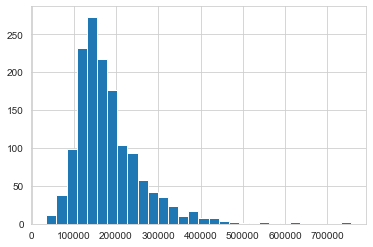

In [517]:
df_house.SalePrice.hist(bins=30)

In [514]:
# defining y
# Using log to get a more 'normal distribution'
df_house['SalePrice_log'] = df_house.SalePrice.apply(np.log)
y = df_house['SalePrice_log']


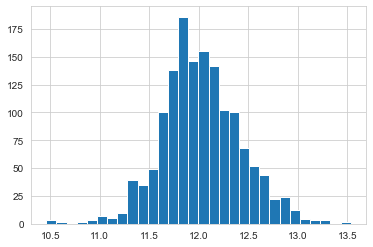

In [516]:
df_house.SalePrice_log.hist(bins=30)

In [520]:
# model
est_house = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC2')
est_house.summary()


/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 326, but rank is 74
  warnings.warn('covariance of constraints does not have full '


0.000       0.004       0.014
HouseStyle__1.5Unf         0.0016      0.001      2.357      0.018       0.000       0.003
HouseStyle__1Story         0.0024      0.004      0.537      0.591      -0.006       0.011
HouseStyle__2.5Fin         0.0012      0.000      3.482      0.000       0.001       0.002
HouseStyle__2.5Unf     -9.379e-05      0.000     -0.230      0.818      -0.001       0.001
HouseStyle__2Story        -0.0032      0.005     -0.686      0.493      -0.012       0.006
HouseStyle__SFoyer        -0.0008      0.001     -0.626      0.531      -0.003       0.002
HouseStyle__SLvl          -0.0014      0.004     -0.403      0.687      -0.008       0.006
OverallQual__2            -0.0011      0.000     -4.930      0.000      -0.002      -0.001
OverallQual__3            -0.0024      0.001     -3.219      0.001      -0.004      -0.001
OverallQual__4            -0.0268      0.006     -4.257      0.000      -0.039      -0.014
OverallQual__5            -0.0012      0.008     -0.153      0.879      -0.016       0.014
OverallQual__6             0.0196      0.007      2.902      0.004       0.006       0.033
OverallQual__7             0.0124      0.007      1.863      0.062      -0.001       0.025
OverallQual__8            -0.0107      0.005     -2.068      0.039      -0.021      -0.001
OverallQual__9             0.0094      0.001      7.760      0.000       0.007       0.012
OverallQual__10            0.0012      0.000      2.850      0.004       0.000       0.002
OverallCond__2            -0.0016      0.000     -3.986      0.000      -0.002      -0.001
OverallCond__3            -0.0047      0.001     -3.641      0.000      -0.007      -0.002
OverallCond__4            -0.0154      0.002     -7.019      0.000      -0.020      -0.011
OverallCond__5            -0.0384      0.007     -5.902      0.000      -0.051      -0.026
OverallCond__6             0.0105      0.007      1.485      0.138      -0.003       0.024
OverallCond__7             0.0599      0.008      7.677      0.000       0.045       0.075
OverallCond__8            -0.0093      0.002     -5.082      0.000      -0.013      -0.006
OverallCond__9            -0.0007      0.001     -0.832      0.406      -0.002       0.001
RoofStyle__Gable          -0.0141      0.006     -2.512      0.012      -0.025      -0.003
RoofStyle__Gambrel         0.0010      0.000      2.660      0.008       0.000       0.002
RoofStyle__Hip             0.0127      0.005      2.429      0.015       0.002       0.023
RoofStyle__Mansard         0.0010      0.000      2.206      0.027       0.000       0.002
RoofStyle__Shed            0.0007      0.000      4.696      0.000       0.000       0.001
RoofMatl__CompShg          0.0013      0.001      1.195      0.232      -0.001       0.003
RoofMatl__Membran          0.0002      0.000      2.010      0.044    5.13e-06       0.000
RoofMatl__Metal            0.0002      0.000      1.190      0.234      -0.000       0.000
RoofMatl__Roll            -0.0002      0.000     -1.806      0.071      -0.000    1.79e-05
RoofMatl__Tar&Grv         -0.0020      0.001     -2.410      0.016      -0.004      -0.000
RoofMatl__WdShake          0.0007      0.000      2.239      0.025    8.63e-05       0.001
RoofMatl__WdShngl      -9.822e-05      0.000     -0.379      0.705      -0.001       0.000
Exterior1st__AsphShn    3.162e-05   8.05e-05      0.393      0.694      -0.000       0.000
Exterior1st__BrkComm      -0.0011      0.000     -4.096      0.000      -0.002      -0.001
Exterior1st__BrkFace       0.0029      0.001      2.714      0.007       0.001       0.005
Exterior1st__CBlock        0.0002      0.000      1.671      0.095   -3.76e-05       0.000
Exterior1st__CemntBd      -0.0048      0.004     -1.280      0.201      -0.012       0.003
Exterior1st__HdBoard   -9.085e-05      0.004     -0.021      0.984      -0.009       0.009
Exterior1st__ImStucc    5.173e-05   7.01e-05      0.738      0.460   -8.56e-05       0.000
Exterior1st__MetalSd       0.0136      0.004      3.295  

In [535]:
est_house.params.index

Index(['const', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType__ConLI', 'SaleType__ConLw', 'SaleType__New', 'SaleType__Oth',
       'SaleType__WD', 'SaleCondition__AdjLand', 'SaleCondition__Alloca',
       'SaleCondition__Family', 'SaleCondition__Normal',
       'SaleCondition__Partial'],
      dtype='object', length=327)

In [ ]:
for p in pvals:
    kept_cols = est_house.loc(pvalues >= .05)

In [558]:
est_house.pvalues.sort_values(ascending=True).index.

Index(['Electrical__FuseP', 'Fireplaces', 'Exterior2nd__Wd Shng',
       'FireplaceQu__Gd', 'Neighborhood__NridgHt', 'FireplaceQu__NA',
       'OverallQual__9', 'OverallCond__7', 'Exterior1st__Stone', 'YearBuilt',
       ...
       'LotShape__IR2', 'KitchenQual__TA', 'Neighborhood__Somerst',
       'MiscFeature__NA', 'Condition1__RRNe', 'Exterior1st__HdBoard',
       '2ndFlrSF', 'WoodDeckSF^2', 'BsmtQual__TA', 'MiscVal^3'],
      dtype='object', length=327)

In [622]:
pvals = pd.DataFrame(est_house.pvalues)
# pvals['pvalue'] = pvals.columns
pvals.columns = ['pvalue']
# X_dropped = X.drop(pvals[pvals['pvalue'] >= 0.4].index)
bye = list(pvals[pvals['pvalue'] >= 0.4].index[1:])
bye2 = list(pvals[pvals['pvalue'] > 0.05].index[1:])
X_dropped = X.drop(columns=bye)
X_dropped_2 = X.drop(columns=bye2)

In [613]:
est_house_1=sm.OLS(y, sm.add_constant(X_dropped)).fit(cov_type='HC2')
est_house_1.summary()

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 230, but rank is 49
  warnings.warn('covariance of constraints does not have full '


0.230      -0.000       0.001
MSSubClass__30             0.0039      0.002      2.315      0.021       0.001       0.007
MSSubClass__40             0.0005      0.000      2.435      0.015    9.21e-05       0.001
MSSubClass__45             0.0012      0.000      2.405      0.016       0.000       0.002
MSSubClass__60             0.0049      0.002      2.768      0.006       0.001       0.008
MSSubClass__70             0.0023      0.001      1.638      0.102      -0.000       0.005
MSSubClass__75          5.801e-05      0.000      0.172      0.864      -0.001       0.001
MSSubClass__90            -0.0229      0.002    -10.503      0.000      -0.027      -0.019
MSSubClass__120            0.0033      0.003      1.213      0.225      -0.002       0.009
MSSubClass__180           -0.0004      0.001     -0.695      0.487      -0.002       0.001
MSSubClass__190           -0.0040      0.001     -3.679      0.000      -0.006      -0.002
MSZoning__RH              -0.0028      0.001     -3.275      0.001      -0.005      -0.001
MSZoning__RL               0.0347      0.007      5.031      0.000       0.021       0.048
MSZoning__RM              -0.0275      0.006     -4.728      0.000      -0.039      -0.016
LotFrontage^2          -2.739e-05   1.18e-05     -2.319      0.020   -5.05e-05   -4.24e-06
LotFrontage^3           5.482e-08   3.08e-08      1.777      0.075   -5.63e-09    1.15e-07
LotArea^2              -6.042e-11    8.3e-11     -0.728      0.466   -2.23e-10    1.02e-10
LotArea^3               2.249e-16   4.19e-16      0.537      0.591   -5.96e-16    1.05e-15
Street__Pave               0.0006      0.000      1.575      0.115      -0.000       0.001
Alley__NA                  0.0078      0.002      3.894      0.000       0.004       0.012
Alley__Pave               -0.0025      0.001     -2.093      0.036      -0.005      -0.000
LotShape__IR3             -0.0020      0.000     -5.949      0.000      -0.003      -0.001
LandContour__HLS           0.0056      0.004      1.482      0.138      -0.002       0.013
LandContour__Lvl          -0.0060      0.009     -0.688      0.491      -0.023       0.011
LotConfig__CulDSac     -8.648e-06      0.001     -0.009      0.993      -0.002       0.002
LotConfig__FR2            -0.0002      0.001     -0.172      0.863      -0.003       0.002
LotConfig__FR3          -7.37e-05      0.000     -0.357      0.721      -0.000       0.000
LandSlope__Sev           4.84e-05      0.001      0.081      0.935      -0.001       0.001
Neighborhood__BrkSide      0.0070      0.002      4.430      0.000       0.004       0.010
Neighborhood__Crawfor      0.0108      0.002      5.480      0.000       0.007       0.015
Neighborhood__Edwards      0.0101      0.003      3.502      0.000       0.004       0.016
Neighborhood__Gilbert      0.0039      0.002      2.263      0.024       0.001       0.007
Neighborhood__IDOTRR      -0.0031      0.002     -1.993      0.046      -0.006   -5.07e-05
Neighborhood__MeadowV     -0.0016      0.001     -1.394      0.163      -0.004       0.001
Neighborhood__NAmes       -0.0114      0.007     -1.601      0.109      -0.025       0.003
Neighborhood__NWAmes      -0.0023      0.002     -1.193      0.233      -0.006       0.002
Neighborhood__NoRidge     -0.0026      0.001     -1.877      0.061      -0.005       0.000
Neighborhood__NridgHt      0.0142      0.002      7.791      0.000       0.011       0.018
Neighborhood__OldTown     -0.0192      0.003     -6.775      0.000      -0.025      -0.014
Neighborhood__SWISU        0.0051      0.001      4.929      0.000       0.003       0.007
Neighborhood__Sawyer      -0.0033      0.003     -1.164      0.244      -0.009       0.002
Neighborhood__SawyerW     -0.0062      0.002     -3.500      0.000      -0.010      -0.003
Neighborhood__Timber       0.0005      0.001      0.555      0.579      -0.001       0.002
Neighborhood__Veenker   1.446e-05      0.000      0.031      0.975      -0.001       0.001
Condition1__Feedr         -0.0213      0.005     -4.458  

In [623]:
est_house_2=sm.OLS(y, sm.add_constant(X_dropped_2)).fit(cov_type='HC2')
est_house_2.summary()


/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 152, but rank is 29
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 1.129e+05
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:37:17   Log-Likelihood:                 462.07
No. Observations:                1459   AIC:                            -904.1
Df Residuals:                    1449   BIC:                            -851.3
Df Model:                           9                                         
Covariance Type:                  HC2                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0170      0.010      1.746      0.081      -0.002       0.036
LotFrontage                0.0017      0.002      0.781      0.435      -0.003       0.006
LotArea                 1.864e-05   9.34e-06      1.996      0.046     3.4e-07    3.69e-05
YearBuilt                  0.0016      0.000      5.329      0.000       0.001       0.002
YearRemodAdd               0.0040      0.000     13.583      0.000       0.003       0.005
FullBath                   0.0903      0.012      7.729      0.000       0.067       0.113
BedroomAbvGr               0.0588      0.009      6.657      0.000       0.041       0.076
KitchenAbvGr               0.0129      0.004      2.883      0.004       0.004       0.022
Fireplaces                 0.0758      0.005     14.762      0.000       0.066       0.086
GarageCars                 0.0348      0.009      3.827      0.000       0.017       0.053
MSSubClass__30            -0.0203      0.006     -3.543      0.000      -0.032      -0.009
MSSubClass__40             0.0016      0.001      2.557      0.011       0.000       0.003
MSSubClass__45             0.0011      0.001      1.176      0.239      -0.001       0.003
MSSubClass__60             0.0076      0.011      0.684      0.494      -0.014       0.029
MSSubClass__70             0.0045      0.003      1.514      0.130      -0.001       0.010
MSSubClass__75             0.0040      0.002      2.252      0.024       0.001       0.008
MSSubClass__90             0.0052      0.003      1.481      0.139      -0.002       0.012
MSSubClass__120            0.0175      0.003      5.345      0.000       0.011       0.024
MSSubClass__190            0.0020      0.001      1.650      0.099      -0.000       0.004
MSZoning__RL               0.0035      0.009      0.385      0.701      -0.014       0.021
MSZoning__RM              -0.0014      0.007     -0.190      0.849      -0.016       0.013
LotFrontage^2          -2.086e-06   1.93e-05     -0.108      0.914   -3.99e-05    3.57e-05
LotFrontage^3          -2.894e-08   5.25e-08     -0.551      0.581   -1.32e-07    7.39e-08
LotArea^2              -2.161e-10   2.69e-10     -0.803      0.422   -7.43e-10    3.11e-10
LotArea^3               6.559e-16   1.41e-15      0.466      0.641    -2.1e-15    3.41e-15
Street__Pave               0.0020      0.001      2.690      0.007       0.001       0.003
LotShape__IR3             -0.0023      0.001     -3.851      0.000      -0.004      -0.001
LandContour__HLS           0.0044      0.001      3.944      0.000       0.002       0.007
Neighborhood__Crawfor      0.0101      0.003      3.716      0.000       0.005       0.015
Neighborhood__Edwards     -0.0279      0.005     -5.652      0.000      -0.038      -0.018
Neighborhood__IDOTRR      -0.0055      0.002     -3.147      0.002      -0.009  

In [635]:
len(list(pvals_2[pvals_2['pvalue'] > 0.05].index[1:]))

49

In [625]:
pvals_2= pd.DataFrame(est_house_2.pvalues)
# pvals['pvalue'] = pvals.columns
pvals_2.columns = ['pvalue']
# X_dropped = X.drop(pvals[pvals['pvalue'] >= 0.4].index)
# bye = list(pvals[pvals['pvalue'] >= 0.4].index[1:])
bye3 = list(pvals_2[pvals_2['pvalue'] > 0.05].index[1:])
# X_dropped = X.drop(columns=bye)
X_dropped_3 = X.drop(columns=bye3)

In [626]:
est_house_3=sm.OLS(y, sm.add_constant(X_dropped_3)).fit(cov_type='HC2')
est_house_3.summary()

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 277, but rank is 237
  warnings.warn('covariance of constraints does not have full '


27       0.211
Neighborhood__Edwards     -0.0246      0.018     -1.386      0.166      -0.059       0.010
Neighborhood__Gilbert      0.0400      0.018      2.171      0.030       0.004       0.076
Neighborhood__IDOTRR      -0.0626      0.037     -1.681      0.093      -0.136       0.010
Neighborhood__MeadowV     -0.1350      0.039     -3.439      0.001      -0.212      -0.058
Neighborhood__Mitchel     -0.0051      0.020     -0.255      0.799      -0.044       0.034
Neighborhood__NAmes        0.0180      0.014      1.255      0.209      -0.010       0.046
Neighborhood__NPkVill      0.0370      0.049      0.750      0.453      -0.060       0.134
Neighborhood__NoRidge      0.0943      0.024      3.927      0.000       0.047       0.141
Neighborhood__NridgHt      0.1053      0.021      5.078      0.000       0.065       0.146
Neighborhood__Sawyer       0.0260      0.019      1.365      0.172      -0.011       0.063
Neighborhood__SawyerW      0.0355      0.017      2.031      0.042       0.001       0.070
Neighborhood__Somerst      0.0584      0.041      1.408      0.159      -0.023       0.140
Neighborhood__StoneBr      0.1551      0.030      5.109      0.000       0.096       0.215
Neighborhood__Timber       0.0494      0.021      2.407      0.016       0.009       0.090
Neighborhood__Veenker      0.0689      0.027      2.596      0.009       0.017       0.121
Condition1__Feedr          0.0133      0.025      0.532      0.595      -0.036       0.062
Condition1__Norm           0.0639      0.019      3.401      0.001       0.027       0.101
Condition1__PosA        1.409e-09      0.051   2.74e-08      1.000      -0.101       0.101
Condition1__RRAe          -0.0717      0.044     -1.638      0.102      -0.157       0.014
Condition1__RRAn           0.0441      0.026      1.680      0.093      -0.007       0.095
Condition1__RRNe          -0.0378      0.115     -0.328      0.743      -0.263       0.188
Condition1__RRNn           0.1056      0.062      1.691      0.091      -0.017       0.228
Condition2__PosA           0.5363      0.204      2.630      0.009       0.137       0.936
Condition2__PosN          -0.3078      0.494     -0.623      0.533      -1.276       0.660
Condition2__RRNn          -0.0228      0.102     -0.223      0.824      -0.223       0.178
BldgType__Twnhs           -0.0450      0.039     -1.163      0.245      -0.121       0.031
BldgType__TwnhsE          -0.0144      0.035     -0.411      0.681      -0.083       0.054
HouseStyle__1Story         0.0177      0.027      0.645      0.519      -0.036       0.071
HouseStyle__2.5Fin        -0.1375      0.118     -1.162      0.245      -0.369       0.094
HouseStyle__2.5Unf        -0.1046      0.111     -0.939      0.348      -0.323       0.114
HouseStyle__2Story        -0.0347      0.031     -1.124      0.261      -0.095       0.026
HouseStyle__SFoyer         0.0321      0.052      0.613      0.540      -0.070       0.135
HouseStyle__SLvl           0.0405      0.051      0.799      0.424      -0.059       0.140
OverallQual__2             0.2872      0.234      1.228      0.219      -0.171       0.746
OverallQual__3             0.4767      0.133      3.598      0.000       0.217       0.736
OverallQual__4             0.5385      0.127      4.240      0.000       0.290       0.787
OverallQual__5             0.5775      0.130      4.434      0.000       0.322       0.833
OverallQual__6             0.6051      0.132      4.592      0.000       0.347       0.863
OverallQual__7             0.6406      0.131      4.872      0.000       0.383       0.898
OverallQual__8             0.6951      0.132      5.264      0.000       0.436       0.954
OverallQual__9             0.7777      0.135      5.748      0.000       0.513       1.043
OverallQual__10            0.7825      0.142      5.498      0.000       0.504       1.061
OverallCond__2             0.0115      0.070      0.165      0.869      -0.126       0.149
OverallCond__3            -0.0659      0.040     -1.634      0.102      

In [722]:
# There must be a for loop or a recursive function that can keep getting rid of the features that have pvalue > .05

# pvals_2= pd.DataFrame(est_house_2.pvalues) #should be inside recursion bc pvals will change with every new model summary
# pvals['pvalue'] = pvals.columns
# pvals_2.columns = ['pvalue'] #should be inside recursion so we have a title for the column of pvalues

my_aic = []

def myrecur(mymodel, my_X, mypval=0.05):
    pvals_2= pd.DataFrame(mymodel.pvalues)
    pvals_2.columns = ['pvalue']
    if len(list(pvals_2[pvals_2['pvalue'] > mypval].index[1:])) <= 0:
        return f'empty' #lowest AIC model? so need all remaining columns (too hard to get all columns that were dropped), and their coeffs, and R2 (essentially the summary)
    else:
        bye3 = list(pvals_2[pvals_2['pvalue'] > mypval].index[1:])
        X_dropped_3 = my_X.drop(columns=bye3)
        mymodel = sm.OLS(y, sm.add_constant(X_dropped_3)).fit(cov_type='HC2')
        # my_aic.append(mymodel.aic)
        myrecur(mymodel, X_dropped_3)
        print(len(bye3))
        print(mymodel.aic)
        print(list(X_dropped_3))
        print('~~~~~')
    
    # need a refresher on recursion, cant remember how to get it to run again. Need 'mymodel' in here somewhere, but where it equals smt slighly less (in this case, less columns)

est_house = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC2')

myrecur(est_house, X, 0.05)

4
-1201.709931486786
['LotArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MSSubClass__30', 'MSSubClass__40', 'Street__Pave', 'Neighborhood__Crawfor', 'Neighborhood__MeadowV', 'Condition1__Norm', 'BldgType__TwnhsE', 'OverallQual__3', 'OverallQual__4', 'OverallQual__8', 'OverallQual__9', 'OverallQual__10', 'OverallCond__3', 'OverallCond__5', 'OverallCond__7', 'RoofStyle__Gable', 'Exterior1st__BrkFace', 'ExterQual__TA', 'Foundation__PConc', 'BsmtFinType1__GLQ', 'BsmtFinType1__Unf', 'BsmtFinType2__NA', 'CentralAir__Y']
~~~~~
68
-1204.7058864161831
['LotArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MSSubClass__30', 'MSSubClass__40', 'Street__Pave', 'Neighborhood__Crawfor', 'Neighborhood__MeadowV', 'Condition1__Norm', 'BldgType__TwnhsE', 'OverallQual__3', 'OverallQual__4', 'OverallQual__8', 'OverallQual__9', 'OverallQual__10', 'OverallCond__3', 'OverallCond__5', 'Overal

In [669]:
curious = X[['LotArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MSSubClass__30', 'MSSubClass__40', 'Street__Pave', 'Neighborhood__Crawfor', 'Neighborhood__MeadowV', 'Condition1__Norm', 'BldgType__TwnhsE', 'OverallQual__3', 'OverallQual__4', 'OverallQual__8', 'OverallQual__9', 'OverallQual__10', 'OverallCond__3', 'OverallCond__5', 'OverallCond__7', 'RoofStyle__Gable', 'RoofStyle__Hip', 'Exterior1st__BrkFace', 'Exterior2nd__Brk Cmn', 'ExterQual__TA', 'Foundation__PConc', 'BsmtExposure__NA', 'BsmtFinType1__GLQ', 'BsmtFinType1__Unf', 'BsmtFinType2__NA', 'CentralAir__Y', 'GarageCond__Fa']]
curious

omg = sm.OLS(y, sm.add_constant(curious)).fit(cov_type='HC2')
omg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     203.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:42:27   Log-Likelihood:                 638.35
No. Observations:                1459   AIC:                            -1205.
Df Residuals:                    1423   BIC:                            -1014.
Df Model:                          35                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.2971      0.722      7.341      0.000       3.883       6.711
LotArea                3.716e-06   8.38e-07      4.432      0.000    2.07e-06    5.36e-06
YearBuilt                 0.0011      0.000      3.668      0.000       0.001       0.002
YearRemodAdd              0.0019      0.000      6.508      0.000       0.001       0.002
FullBath                  0.1086      0.013      8.636      0.000       0.084       0.133
BedroomAbvGr              0.0479      0.007      6.632      0.000       0.034       0.062
KitchenAbvGr             -0.0585      0.025     -2.350      0.019      -0.107      -0.010
Fireplaces                0.0958      0.008     12.426      0.000       0.081       0.111
GarageCars                0.1102      0.009     12.005      0.000       0.092       0.128
MSSubClass__30           -0.1547      0.027     -5.666      0.000      -0.208      -0.101
MSSubClass__40            0.0139      0.143      0.097      0.923      -0.267       0.294
Street__Pave              0.2790      0.115      2.417      0.016       0.053       0.505
Neighborhood__Crawfor     0.1773      0.025      7.156      0.000       0.129       0.226
Neighborhood__MeadowV    -0.1913      0.024     -8.029      0.000      -0.238      -0.145
Condition1__Norm          0.0467      0.014      3.230      0.001       0.018       0.075
BldgType__TwnhsE         -0.0611      0.016     -3.773      0.000      -0.093      -0.029
OverallQual__3           -0.1656      0.054     -3.063      0.002      -0.271      -0.060
OverallQual__4           -0.0845      0.021     -4.071      0.000      -0.125      -0.044
OverallQual__8            0.1883      0.016     12.119      0.000       0.158       0.219
OverallQual__9            0.3924      0.030     13.082      0.000       0.334       0.451
OverallQual__10           0.4298      0.096      4.495      0.000       0.242       0.617
OverallCond__3           -0.2391      0.052     -4.561      0.000      -0.342      -0.136
OverallCond__5           -0.0471      0.012     -3.930      0.000      -0.071      -0.024
OverallCond__7            0.0315      0.012      2.531      0.011       0.007       0.056
RoofStyle__Gable         -0.0908      0.043     -2.133      0.033      -0.174      -0.007
RoofStyle__Hip           -0.0652      0.043     -1.502      0.133      -0.150       0.020
Exterior1st__BrkFace      0.0946      0.029      3.274      0.001       0.038       0.151
Exterior2nd__Brk Cmn     -0.1142      0.070     -1.629      0.103      -0.252       0.023
ExterQual__TA            -0.0810      0.013     -6.414      0.000      -0.106      -0.056
Foundation__PConc         0.0486      0.013      3.783      0.000       0.023       0.074
BsmtExposure__NA         -0.0877      0.050     -1.764      0.078      -0.185       0.010
BsmtFinType1__GLQ      

In [720]:
# Tried a cute little RFE to see which features it would suggest keeping. 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

num_feats=18
X_norm = MinMaxScaler().fit_transform(X)
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
list(rfe_feature)

Fitting estimator with 326 features.
Fitting estimator with 316 features.
Fitting estimator with 306 features.
Fitting estimator with 296 features.
Fitting estimator with 286 features.
Fitting estimator with 276 features.
Fitting estimator with 266 features.
Fitting estimator with 256 features.
Fitting estimator with 246 features.
Fitting estimator with 236 features.
Fitting estimator with 226 features.
Fitting estimator with 216 features.
Fitting estimator with 206 features.
Fitting estimator with 196 features.
Fitting estimator with 186 features.
Fitting estimator with 176 features.
Fitting estimator with 166 features.
Fitting estimator with 156 features.
Fitting estimator with 146 features.
Fitting estimator with 136 features.
Fitting estimator with 126 features.
Fitting estimator with 116 features.
Fitting estimator with 106 features.
Fitting estimator with 96 features.
Fitting estimator with 86 features.
Fitting estimator with 76 features.
Fitting estimator with 66 features.
Fitti

['MSZoning__RL',
 'OverallQual__3',
 'OverallQual__4',
 'OverallQual__5',
 'OverallQual__6',
 'OverallQual__7',
 'OverallQual__8',
 'OverallQual__9',
 'OverallQual__10',
 'RoofMatl__CompShg',
 'RoofMatl__Membran',
 'RoofMatl__Metal',
 'RoofMatl__Roll',
 'RoofMatl__Tar&Grv',
 'RoofMatl__WdShake',
 'RoofMatl__WdShngl',
 'Exterior1st__BrkComm',
 'Heating__GasW']

In [730]:
RFE_X = X[['Neighborhood__Crawfor',
 'Neighborhood__Edwards',
 'Neighborhood__IDOTRR',
 'Neighborhood__MeadowV',
 'Neighborhood__StoneBr',
 'Condition1__RRAe',
 'OverallQual__3',
 'OverallQual__9',
 'OverallQual__10',
 'OverallCond__3',
 'OverallCond__4',
 'OverallCond__8',
 'OverallCond__9',
 'RoofStyle__Mansard',
 'Exterior1st__BrkFace',
 'ExterQual__Fa',
 'CentralAir__Y',
 'Functional__Typ']]

omg = sm.OLS(y, RFE_X).fit(cov_type='HC2')
omg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          SalePrice_log   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          1.453e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:35:49   Log-Likelihood:                         -3082.2
No. Observations:                1459   AIC:                                      6200.
Df Residuals:                    1441   BIC:                                      6296.
Df Model:                          18                                                  
Covariance Type:                  HC2                                                  
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Neighborhood__Crawfor     1.0309      0.332      3.105      0.002       0.380       1.682
Neighborhood__Edwards     1.0084      0.309      3.264      0.001       0.403       1.614
Neighborhood__IDOTRR      1.2569      0.544      2.311      0.021       0.191       2.323
Neighborhood__MeadowV    -0.8868      0.350     -2.536      0.011      -1.572      -0.201
Neighborhood__StoneBr     0.7897      0.323      2.447      0.014       0.157       1.422
Condition1__RRAe          1.1343      0.771      1.471      0.141      -0.377       2.645
OverallQual__3            2.0890      0.829      2.520      0.012       0.464       3.714
OverallQual__9            0.6125      0.067      9.181      0.000       0.482       0.743
OverallQual__10           0.7235      0.174      4.165      0.000       0.383       1.064
OverallCond__3            2.7827      0.816      3.408      0.001       1.182       4.383
OverallCond__4            2.3499      0.526      4.464      0.000       1.318       3.382
OverallCond__8            0.4604      0.281      1.640      0.101      -0.090       1.011
OverallCond__9           -0.2125      0.123     -1.730      0.084      -0.453       0.028
RoofStyle__Mansard        1.7156      1.184      1.449      0.147      -0.606       4.037
Exterior1st__BrkFace      0.6779      0.318      2.132      0.033       0.055       1.301
ExterQual__Fa             3.2271      1.360      2.373      0.018       0.561       5.893
CentralAir__Y             6.8013      0.386     17.603      0.000       6.044       7.559
Functional__Typ           5.2641      0.391     13.464      0.000       4.498       6.030
==============================================================================
Omnibus:                      606.844   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3043.933
Skew:                           1.916   Prob(JB):                         0.00
Kurtosis:                       8.949   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [729]:
#Also this way, had LinearRegression(penalty='l1') but that was for logistic regression, dont know what the equivalent is for linear regression. But decent features. 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

embeded_lr_selector = SelectFromModel(LinearRegression(), max_features=num_feats)
X = sm.add_constant(X)
embeded_lr_selector.fit(X, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
list(embeded_lr_feature)


18 selected features


['Neighborhood__Crawfor',
 'Neighborhood__Edwards',
 'Neighborhood__IDOTRR',
 'Neighborhood__MeadowV',
 'Neighborhood__StoneBr',
 'Condition1__RRAe',
 'OverallQual__3',
 'OverallQual__9',
 'OverallQual__10',
 'OverallCond__3',
 'OverallCond__4',
 'OverallCond__8',
 'OverallCond__9',
 'RoofStyle__Mansard',
 'Exterior1st__BrkFace',
 'ExterQual__Fa',
 'CentralAir__Y',
 'Functional__Typ']

In [406]:
# changing PoolQC's NaN's to NA (because means no pool)

df_house.PoolQC = df_house.PoolQC.fillna('NA')
df_house.PoolQC.isnull().sum()

0

In [407]:
# changing MiscFeature's Nan's to NA (because means no misc feature)

df_house.MiscFeature = df_house.MiscFeature.fillna('NA')
df_house.MiscFeature.isnull().sum()

0

In [408]:
# changing Alley's Nan's to NA (because means no alley)

df_house.Alley = df_house.Alley.fillna('NA')
df_house.Alley.isnull().sum()

# changing Fence's Nan's to NA (because means no fence)

df_house.Fence = df_house.Fence.fillna('NA')
df_house.Fence.isnull().sum()

# changing FireplaceQU's Nan's to NA (because means no fireplace)

df_house.FireplaceQu = df_house.FireplaceQu.fillna('NA')
df_house.FireplaceQu.isnull().sum()

0

In [409]:
# LotFrontage... how to deal? Mean values?

df_house.LotFrontage.describe()

df_house.LotFrontage = df_house.LotFrontage.fillna(df_house.LotFrontage.mean())
df_house.LotFrontage.isnull().sum()

0

In [426]:
# changing the Garage Nan's to NA (because means no garage)

df_house.GarageCond = df_house.GarageCond.fillna('NA')
df_house.GarageCond.isnull().sum()

df_house.GarageType = df_house.GarageType.fillna('NA')
df_house.GarageType.isnull().sum()

# For year.... maybe set as the mean?
df_house.GarageYrBlt = df_house.GarageYrBlt.fillna(df_house.GarageYrBlt.mean())
df_house.GarageYrBlt.isnull().sum()
df_house.GarageYrBlt = df_house.GarageYrBlt.astype('int64')
df_house.GarageYrBlt.unique()

array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1920, 1966, 1959, 1995, 1954, 1953, 1978, 1983,
       1977, 1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945, 1987,
       1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1900, 1979,
       1951, 1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986, 1988,
       1916, 1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910,
       1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938, 1952,
       1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933])

In [481]:
# changing garagefinish's nans

df_house.GarageFinish = df_house.GarageFinish.fillna('NA')
df_house.GarageFinish.isnull().sum()

# changing garagequal's nans

df_house.GarageQual = df_house.GarageQual.fillna('NA')
df_house.GarageQual.isnull().sum()

# changing basementexposure's nans

df_house.BsmtExposure = df_house.BsmtExposure.fillna('NA')
df_house.BsmtExposure.isnull().sum()

# changing basementfintype1 and 2's nans
df_house.BsmtFinType1 = df_house.BsmtFinType1.fillna('NA')
df_house.BsmtFinType2 = df_house.BsmtFinType2.fillna('NA')

# changing basement condition and qualitys nans to NA
df_house.BsmtCond = df_house.BsmtCond.fillna('NA')
df_house.BsmtQual = df_house.BsmtQual.fillna('NA')

# chaning MasVnrType and MasVnrArea to None and 0
df_house.MasVnrType = df_house.MasVnrType.fillna('None')
df_house.MasVnrArea = df_house.MasVnrArea.fillna(0)

# df_house.drop.loc(df_house[df_house.Electrical == 'nan'])
# i = df_house[(df_house.Electrical == 'nan')].index
# df_house = df_house.drop(i)
# df_house.Electrical.drop().isnull()
df_house.isnull().sum().sort_values(ascending=False)
df_house = df_house.dropna()
list(df_house.columns)
df_house.isnull().sum().sort_values(ascending=False)
# i = df[((df.Name == 'jhon') &( df.Age == 15) & (df.Grade == 'A'))].index
# df_house.Electrical.unique()
# need to put these in a for loop

SalePrice_log    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
Id               0
Length: 82, dtype: int64

In [485]:
df_house.corrwith(df_house['SalePrice_log']).sort_values(ascending=False)

SalePrice_log    1.000000
SalePrice        0.948384
OverallQual      0.817368
GrLivArea        0.700941
GarageCars       0.680645
GarageArea       0.650916
TotalBsmtSF      0.612642
1stFlrSF         0.597218
FullBath         0.594891
YearBuilt        0.586827
YearRemodAdd     0.565822
TotRmsAbvGrd     0.534436
GarageYrBlt      0.502237
Fireplaces       0.489609
MasVnrArea       0.426827
BsmtFinSF1       0.372152
LotFrontage      0.336157
WoodDeckSF       0.334135
OpenPorchSF      0.321113
2ndFlrSF         0.319344
HalfBath         0.314135
LotArea          0.257321
BsmtFullBath     0.236285
BsmtUnfSF        0.222001
BedroomAbvGr     0.209044
ScreenPorch      0.121213
PoolArea         0.069798
MoSold           0.057338
3SsnPorch        0.054901
BsmtFinSF2       0.004835
BsmtHalfBath    -0.005147
Id              -0.017969
MiscVal         -0.020020
OverallCond     -0.036867
YrSold          -0.037264
LowQualFinSF    -0.037962
MSSubClass      -0.073971
KitchenAbvGr    -0.147549
EnclosedPorc

In [482]:
X = df_house.drop(columns=['SalePrice', 'SalePrice_log'], axis=1)
y = df_house['SalePrice_log']
X = sm.add_constant(X)

ohe_var = ['']

est = sm.OLS(y, X).fit()
est.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

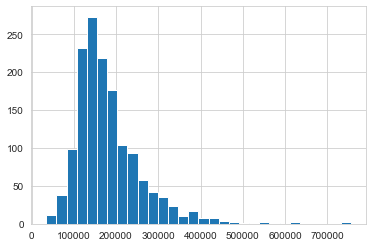

In [418]:
df_house.SalePrice.hist(bins=30)


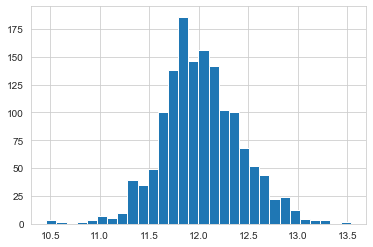

In [421]:
df_house['SalePrice_log'] = df_house.SalePrice.apply(np.log)
df_house.SalePrice_log.hist(bins=30)